In [1]:
import sqlite3

In [2]:
conn = sqlite3.connect('sales_data.db')

In [3]:
cur = conn.cursor()

In [4]:
# Create the 'sales' table
cur.execute('''
    CREATE TABLE IF NOT EXISTS sales (
        id INTEGER PRIMARY KEY,
        product TEXT,
        quantity INTEGER,
        price REAL
    )
''')

In [5]:

# Insert some sample data
sales_data = [
    ('Product A', 10, 20.0),
    ('Product B', 5, 15.0),
    ('Product A', 8, 20.0),
    ('Product C', 12, 10.0),
    ('Product B', 7, 15.0),
]

In [6]:
cur.executemany('INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)', sales_data)

In [7]:
conn.commit()

In [8]:
conn.close()

In [9]:
print("sales_data.db created successfully with sample data!")

sales_data.db created successfully with sample data!


In [10]:
import pandas as pd

In [11]:
conn = sqlite3.connect('sales_data.db')

In [12]:
query = """
SELECT product,
       SUM(quantity) AS total_quantity,
       SUM(quantity * price) AS total_revenue
FROM sales
GROUP BY product
"""

In [13]:
# Run the query and load results into a DataFrame
df = pd.read_sql_query(query, conn)

In [14]:
print(df)

     product  total_quantity  total_revenue
0  Product A              18          360.0
1  Product B              12          180.0
2  Product C              12          120.0


In [15]:
conn.close()

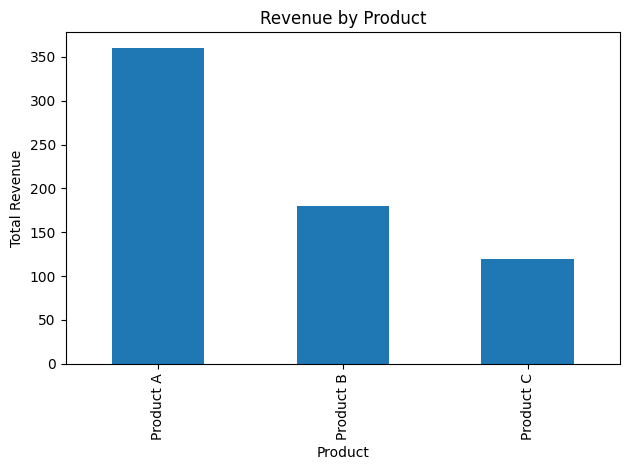

In [16]:
import matplotlib.pyplot as plt

df.plot(kind='bar', x='product', y='total_revenue', legend=False)

plt.title('Revenue by Product')
plt.ylabel('Total Revenue')
plt.xlabel('Product')
plt.tight_layout()

plt.show()


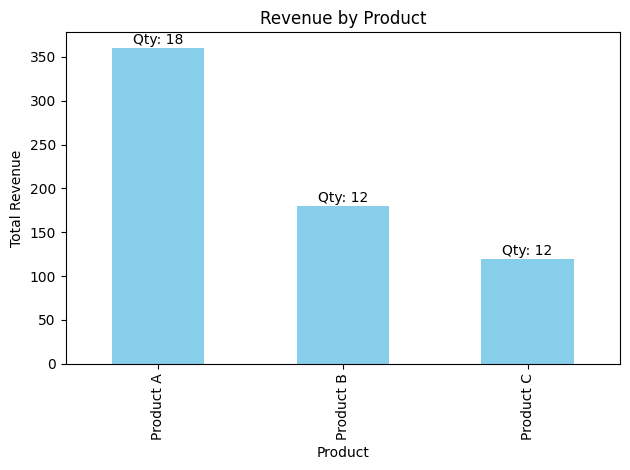

In [17]:
# Plot the bar chart
ax = df.plot(kind='bar', x='product', y='total_revenue', legend=False, color='skyblue')
plt.title('Revenue by Product')
plt.ylabel('Total Revenue')
plt.xlabel('Product')
plt.tight_layout()

for i, row in df.iterrows():
    ax.text(i, row['total_revenue'] + 1, f"Qty: {row['total_quantity']}", ha='center', va='bottom')

plt.show()


In [18]:
df = df.sort_values(by='total_revenue', ascending=False)


In [22]:
print(df)

     product  total_quantity total_revenue
0  Product A              18       ₹360.00
1  Product B              12       ₹180.00
2  Product C              12       ₹120.00
